# Import image

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

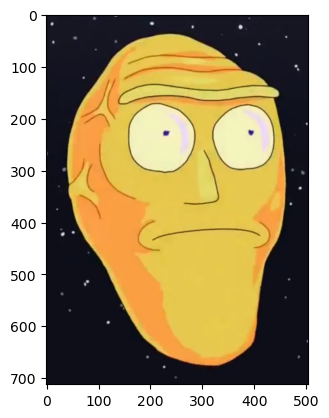

In [2]:
loc_input_img = os.path.join('..', 'data', 'input', 'showmewhatyougot.png')
image = Image.open(loc_input_img)
np_image = np.array(image)
plt.imshow(np_image)
plt.show()

# Square

In [3]:
def make_square(im):
    (a, b) = im.shape[0:2]
    if a > b:
        pad_size = ((0,0),((a-b)//2,(a-b)-((a-b)//2)),(0,0))
    else:
        pad_size = (((b-a)//2,(b-a)-((b-a)//2)),(0,0),(0,0))
    return np.pad(im, pad_size, mode = 'minimum')

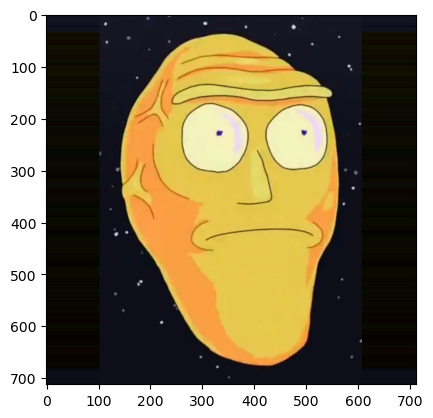

In [4]:
im_square = np_image.copy()
im_square = make_square(im_square)
plt.imshow(im_square)
plt.show()

# Tiles

In [5]:
def tile_floor(im, floor_width, floor_length):
    tile_matrix = np.array([[[0 for i in range(1)] for j in range(floor_width)] for k in range(floor_length)])
    floor_size = tile_matrix.shape
    return np.tile(im, floor_size)

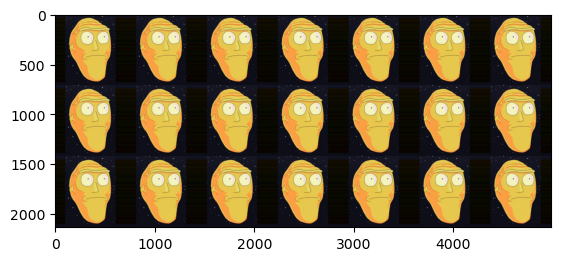

In [6]:
width = 7
length = 3
im_tiles = im_square.copy()
im_tiles = tile_floor(im_tiles, width, length)
plt.imshow(im_tiles)
plt.show()

# Flips

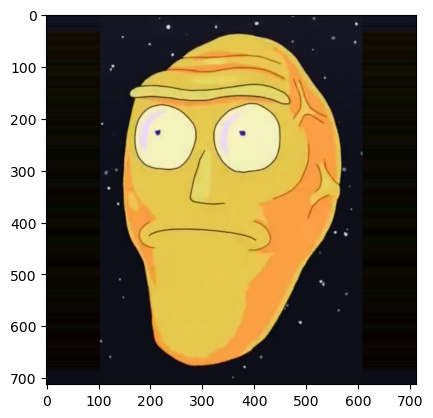

In [7]:
im_flip_leftright = im_square.copy()
im_flip_leftright = np.fliplr(im_flip_leftright)
plt.imshow(im_flip_leftright)
plt.show()

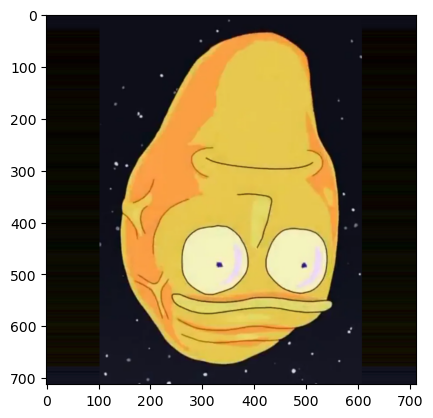

In [8]:
im_flip_updown = im_square.copy()
im_flip_updown = np.flipud(im_flip_updown)
plt.imshow(im_flip_updown)
plt.show()

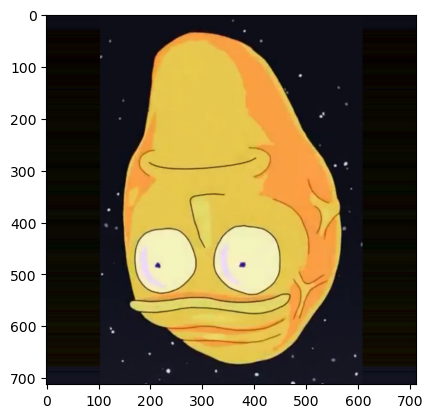

In [9]:
im_flip_both = im_square.copy()
im_flip_both = np.fliplr(np.flipud(im_flip_both))
plt.imshow(im_flip_both)
plt.show()

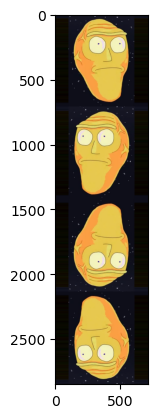

In [10]:
im_vert = im_square.copy()
im_vert = np.concatenate([im_square, im_flip_leftright, im_flip_updown, im_flip_both], axis = 0)
plt.imshow(im_vert)
plt.show()

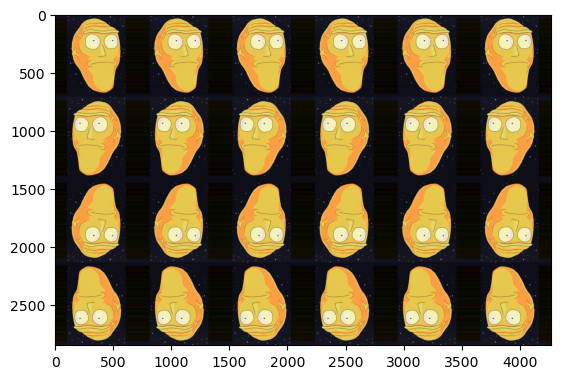

In [11]:
im_flips = im_vert.copy()
im_flips = np.tile(im_flips, (1, 6, 1))
plt.imshow(im_flips)
plt.show()

In [12]:
dict_fun = {
    '0' : im_square,
    '1' : im_flip_leftright,
    '2' : im_flip_updown,
    '3' : im_flip_both
}

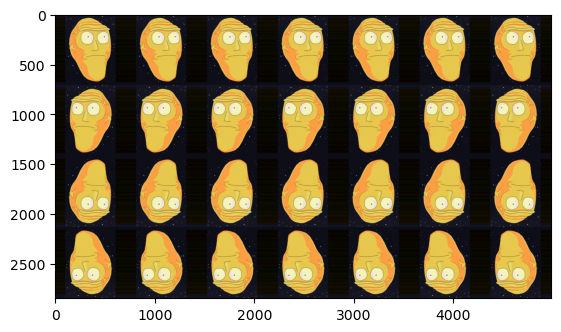

In [14]:
grid_width = 7
im_vert = im_square.copy()
im_vert = np.concatenate([dict_fun['0'], dict_fun['1'], dict_fun['2'], dict_fun['3']], axis = 0)
im_flips = np.tile(im_vert, (1, grid_width, 1))
plt.imshow(im_flips)
plt.show()

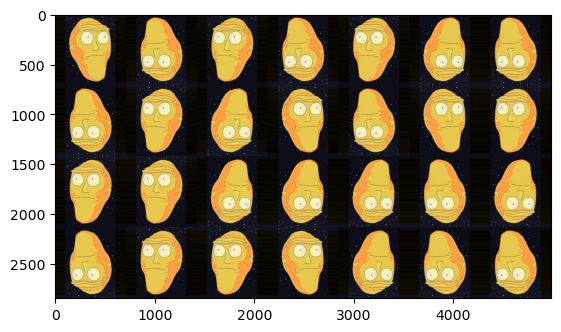

In [25]:
grid_length = 4
grid_width = 7
flip_matrix =  np.random.randint(0, 4, size=(grid_length, grid_width))

flipped_grid = np.array([])
for i in range(len(flip_matrix)):
    flipped_row = np.array([])
    for j in flip_matrix[i,:]:
        if flipped_row.size == 0:
            flipped_row = dict_fun[str(j)]
        else:
            flipped_row = np.concatenate([flipped_row, dict_fun[str(j)]], axis = 1)
            
    if flipped_grid.size == 0:
        flipped_grid = flipped_row
    else:
        flipped_grid = np.concatenate([flipped_grid, flipped_row], axis = 0)

plt.imshow(flipped_grid)
plt.show()

In [15]:
def grid_with_flips(im, matrix):
    
    dict_fun = {
        '0' : make_square(im),
        '1' : np.fliplr(make_square(im)),
        '2' : np.flipud(make_square(im)),
        '3' : np.fliplr(np.flipud(make_square(im)))
    }

    flipped_grid = np.array([])
    for i in range(len(matrix)):
        flipped_row = np.array([])
        for j in matrix[i,:]:
            if flipped_row.size == 0:
                flipped_row = dict_fun[str(j)]
            else:
                flipped_row = np.concatenate([flipped_row, dict_fun[str(j)]], axis = 1)
            
        if flipped_grid.size == 0:
            flipped_grid = flipped_row
        else:
            flipped_grid = np.concatenate([flipped_grid, flipped_row], axis = 0)
    return flipped_grid

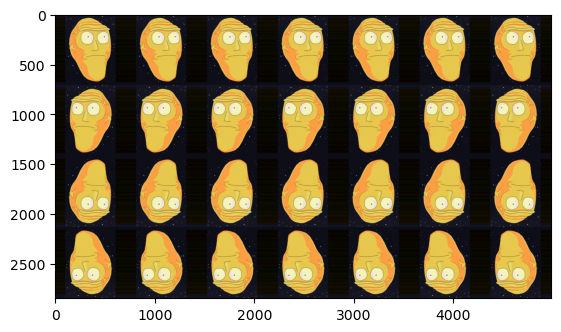

In [24]:
grid_length = 4
grid_width = 7
flip_matrix = np.array([[j for i in range(grid_width)] for j in range(grid_length)])
flipped = grid_with_flips(np_image.copy(), flip_matrix)
plt.imshow(flipped)
plt.show()

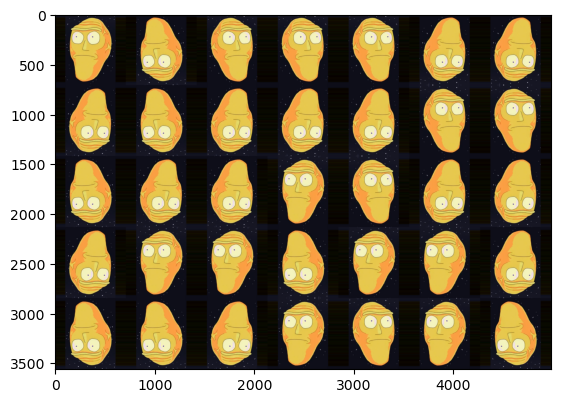

In [23]:
# max 10!! min 1!!
grid_length = 5
grid_width = 7
flip_matrix =  np.random.randint(0, 4, size = (grid_length, grid_width))
flipped = grid_with_flips(np_image.copy(), flip_matrix)
plt.imshow(flipped)
plt.show()

# Colors

In [ ]:
#def create_colorful_big_one(colors)
# create_colorful_big_one(['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r'])

In [26]:
def red_resize(im, scale):
    im[:,:,[1,2]] = 0
    im = im[::scale, ::scale]
    return im

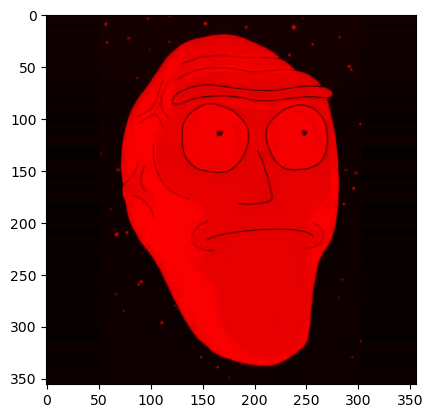

In [27]:
red_im = im_square.copy()
red_im = red_resize(red_im, 2)
plt.imshow(red_im)
plt.show()

In [28]:
def green_resize(im, scale):
    im[:,:,[0,2]] = 0
    im = im[::scale, ::scale]
    return im

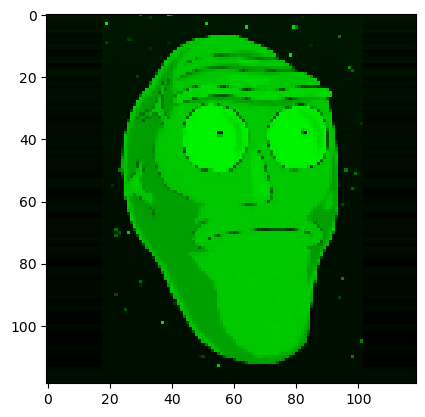

In [29]:
green_im = im_square.copy()
green_im = green_resize(green_im, 6)
plt.imshow(green_im)
plt.show()

In [30]:
def blue_resize(im, scale):
    im[:,:,[0,1]] = 0
    im = im[::scale, ::scale]
    return im

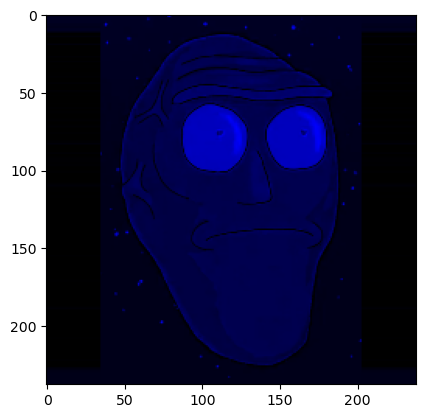

In [31]:
blue_im = im_square.copy()
blue_im = blue_resize(blue_im, 3)
plt.imshow(blue_im)
plt.show()

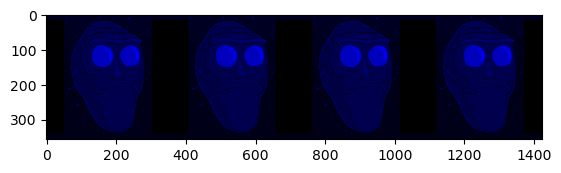

In [32]:
top_row = np.tile(blue_resize(im_square.copy(), 2), (1, 4, 1))
plt.imshow(top_row)
plt.show()

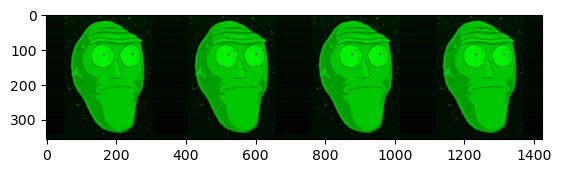

In [33]:
bottom_row = np.tile(green_resize(im_square.copy(), 2), (1, 4, 1))
plt.imshow(bottom_row)
plt.show()

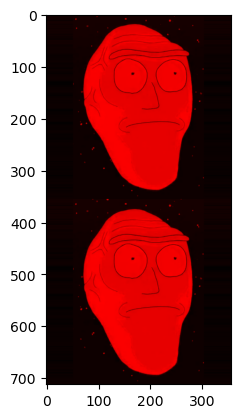

In [34]:
side = np.tile(red_resize(im_square.copy(), 2), (2, 1, 1))
plt.imshow(side)
plt.show()

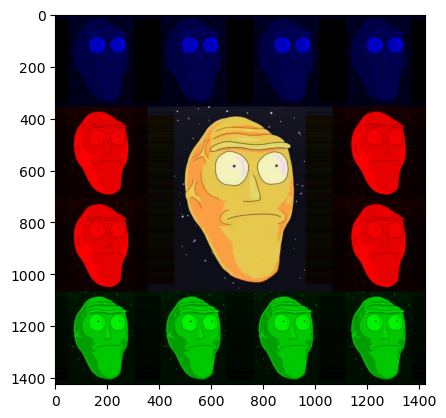

In [35]:
im_colors = im_square.copy()
im_colors = np.concatenate((side, im_colors, side), axis = 1)
im_colors = np.concatenate((top_row, im_colors, bottom_row), axis = 0)
plt.imshow(im_colors)
plt.show()

In [51]:
import random

scale = 3
list_length = 4*scale + 4
letters = 'rbg'

colors = random.choices(letters, k = list_length)

print(colors)

['b', 'b', 'r', 'b', 'r', 'r', 'g', 'r', 'r', 'b', 'b', 'b', 'r', 'b', 'r', 'r']


In [ ]:
top_row = np.tile(blue_resize(im_square.copy(), 2), (1, 4, 1))
side = np.tile(red_resize(im_square.copy(), 2), (2, 1, 1))
bottom_row = np.tile(green_resize(im_square.copy(), 2), (1, 4, 1))
side = np.tile(red_resize(im_square.copy(), 2), (2, 1, 1))

In [56]:
dict_col_fun = {
    'r' : red_resize(im, scale),
    'b' : blue_resize(im, scale),
    'g' : green_resize(im, scale)
}

NameError: name 'im' is not defined

In [55]:
toprow = np.array([])
for i in colors[0:scale + 2]:
    if toprow.size == 0:
        toprow = 

b
b
r
b
r


In [ ]:
def create_colorful_big_one(im, colors, scale):
    

In [ ]:
# erase
def grid_with_flips(im, matrix):
    
    dict_fun = {
        '0' : make_square(im),
        '1' : np.fliplr(make_square(im)),
        '2' : np.flipud(make_square(im)),
        '3' : np.fliplr(np.flipud(make_square(im)))
    }

    flipped_grid = np.array([])
    for i in range(len(matrix)):
        flipped_row = np.array([])
        for j in matrix[i,:]:
            if flipped_row.size == 0:
                flipped_row = dict_fun[str(j)]
            else:
                flipped_row = np.concatenate([flipped_row, dict_fun[str(j)]], axis = 1)
            
        if flipped_grid.size == 0:
            flipped_grid = flipped_row
        else:
            flipped_grid = np.concatenate([flipped_grid, flipped_row], axis = 0)
    return flipped_grid